On the cifar10 dataset first applying ann then cnn to see the improvement in accuracy


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import  matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
classes[9]

'truck'

In [9]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

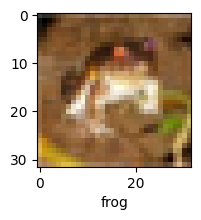

In [10]:
plot_sample(x_train, y_train, 0)

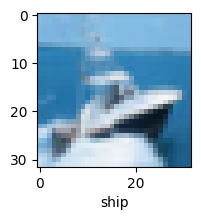

In [11]:
plot_sample(x_train, y_train, 8)

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')

])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8079 - accuracy: 0.3582
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6210 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5406 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4795 - accuracy: 0.4807
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4295 - accuracy: 0.4956


In [14]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6240 - accuracy: 0.4338


[1.6239796876907349, 0.43380001187324524]

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.35      0.45      1000
           1       0.77      0.30      0.44      1000
           2       0.30      0.46      0.37      1000
           3       0.26      0.55      0.35      1000
           4       0.53      0.26      0.35      1000
           5       0.58      0.12      0.20      1000
           6       0.39      0.73      0.51      1000
           7       0.50      0.57      0.53      1000
           8       0.75      0.41      0.53      1000
           9       0.48      0.58      0.53      1000

    accuracy                           0.43     10000
   macro avg       0.52      0.43      0.43     10000
weighted avg       0.52      0.43      0.43     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(x_train, y_train, epochs=20
        )

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 1.5077 - accuracy: 0.4634
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2196 - accuracy: 0.5745
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1005 - accuracy: 0.6159
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0231 - accuracy: 0.6446
Epoch 5/20
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9558 - accuracy: 0.6680
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9017 - accuracy: 0.6878
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8575 - accuracy: 0.7005
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8116 - accuracy: 0.7174
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7798 - accuracy: 0.7278
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.744

In [19]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3895 - accuracy: 0.6326


[1.3894858360290527, 0.6326000094413757]

In [20]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

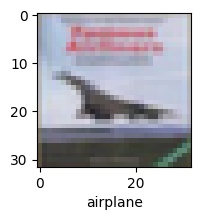

In [21]:
plot_sample(x_test, y_test,3)

In [22]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[2.33551491e-05, 2.00254976e-06, 5.15645230e-03, 8.78592670e-01,
        8.67399867e-05, 2.61537335e-03, 1.12179607e-01, 2.15904024e-07,
        1.34345971e-03, 9.62787254e-08],
       [8.31643320e-06, 3.32059115e-02, 8.71053160e-11, 3.49798124e-09,
        1.36959263e-11, 3.32998684e-10, 7.40693878e-12, 7.56960900e-13,
        9.66767550e-01, 1.82033818e-05],
       [2.94138968e-01, 2.27054343e-01, 1.64725534e-05, 1.50399683e-05,
        1.58356252e-05, 1.55850444e-07, 3.68392818e-08, 6.48771020e-05,
        3.60324562e-01, 1.18369646e-01],
       [5.73019564e-01, 1.22397445e-01, 1.96062267e-01, 3.51637141e-06,
        5.65930852e-04, 6.03296371e-07, 6.41582534e-03, 3.03982006e-07,
        1.01126507e-01, 4.08011460e-04],
       [8.91624126e-08, 1.79076721e-06, 2.23398842e-02, 2.84094423e-01,
        2.16622874e-01, 5.05957194e-03, 4.71879780e-01, 3.14297677e-09,
        2.51175464e-07, 1.32220441e-06]], dtype=float32)

In [23]:
y_classess=[np.argmax(element) for element in y_pred]
y_classess[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [25]:
classes[y_classess[3]]

'airplane'

In [26]:
print("Classification Report: \n", classification_report(y_test, y_classess))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.64      0.67      1000
           1       0.74      0.75      0.75      1000
           2       0.56      0.40      0.46      1000
           3       0.43      0.46      0.45      1000
           4       0.55      0.63      0.59      1000
           5       0.50      0.60      0.55      1000
           6       0.72      0.69      0.70      1000
           7       0.73      0.64      0.68      1000
           8       0.75      0.76      0.76      1000
           9       0.69      0.76      0.72      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.63     10000
weighted avg       0.64      0.63      0.63     10000

